In [ ]:
pip install  pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 21.0 MB/s eta 0:00:00


## Import Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import pycountry
import geopandas as gpd


import warnings
warnings.filterwarnings("ignore")


# Cargamos el fichero con pandas

### Compartiendo con goggle drive

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10JJmUmZaDE8k8AQs2gKbPZGPmrIH6GQG")

### Montando Google Drive en colab
### También lo podríamos haber hecho como antes, pero el objetivo es ver otro método.
### El fichero de Naciones Unidas que vamos a cargar tiene datos que nos pueden ayudar a enriquecer desde el proceso de EDA. https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

## También vamos a trabajar amentando los daots con este archivo: https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx
Lo podemos descargar y guardar en google drive. Así tendremos dos dataset df y df_more_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Como el fichero de naciones unidas tiene muchas cabeceras y columnas vacías, identificamos las que no interesan. Podemos prescindir de las primeras 8 filas. Sólo necesitamos las columnas 1,2,8,10
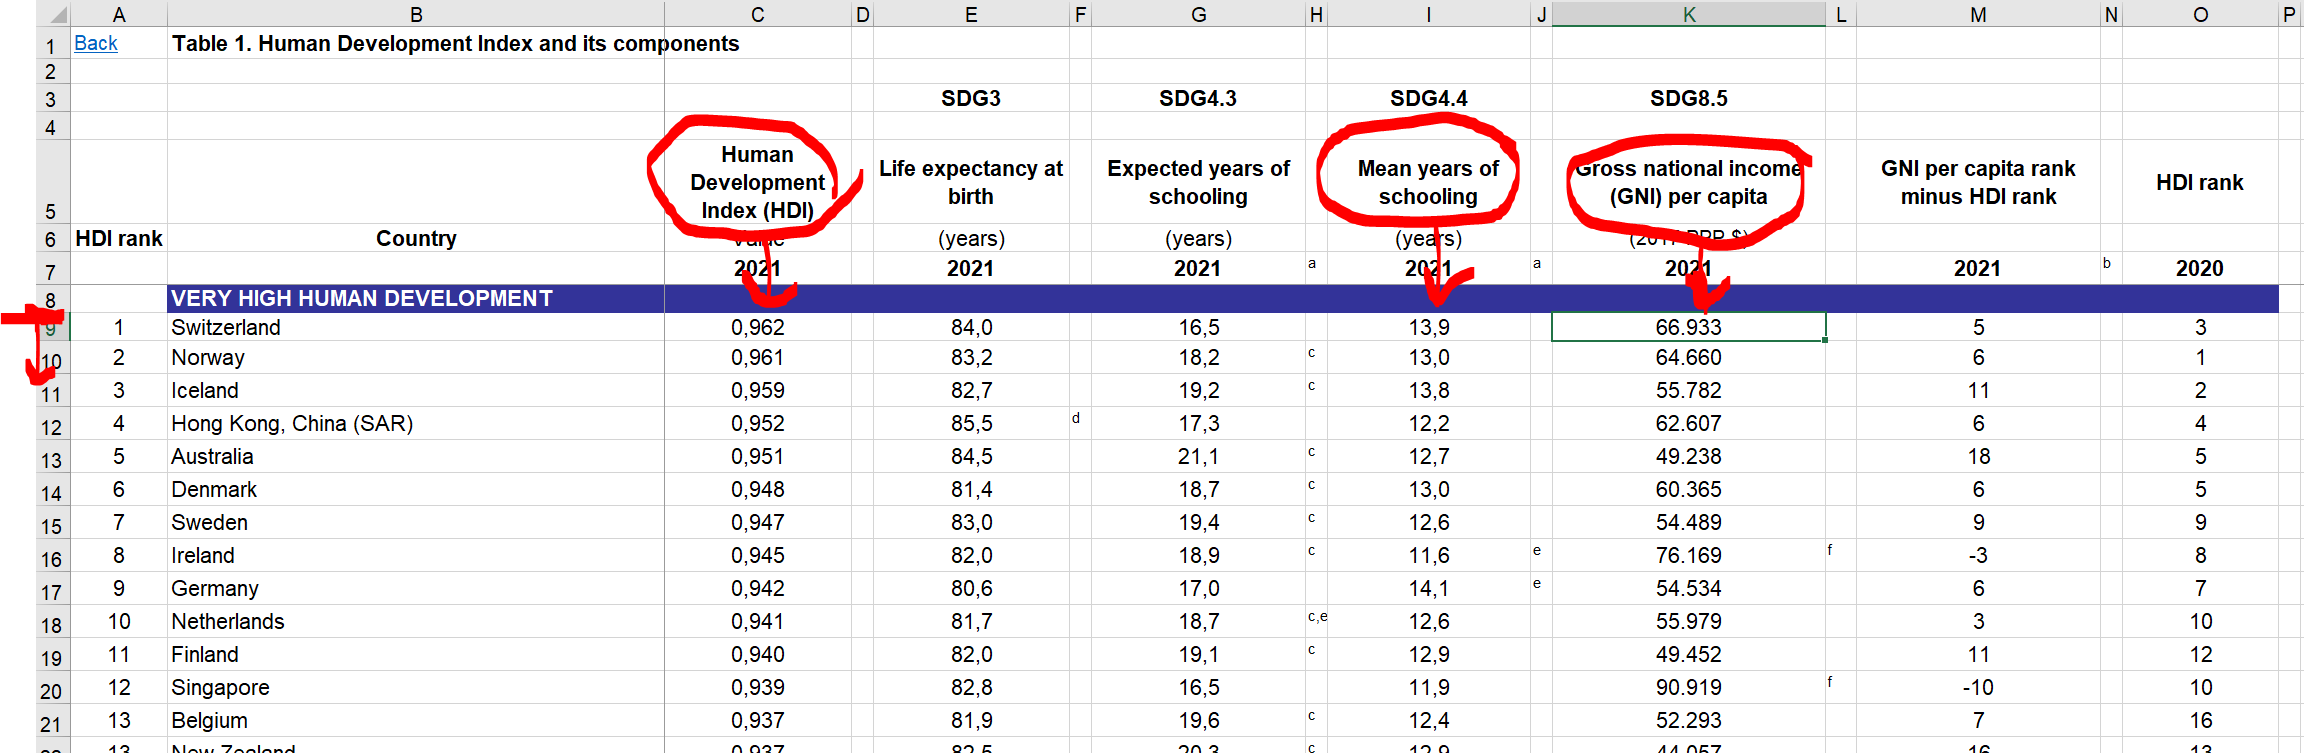

In [ ]:
df_more_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/HDR21-22_Statistical_Annex_HDI_Table.xlsx', skiprows=7, usecols=[1,2,8,10])
print(df_more_data.head())

  VERY HIGH HUMAN DEVELOPMENT Unnamed: 2 Unnamed: 8  Unnamed: 10
0                 Switzerland      0.962   13.85966  66933.00454
1                      Norway      0.961   13.00363  64660.10622
2                     Iceland      0.959   13.76717  55782.04981
3      Hong Kong, China (SAR)      0.952   12.22621   62606.8454
4                   Australia      0.951   12.72682  49238.43335


### Las cabeceras no nos sirven, vamos a crear las nuestras


In [ ]:
print(df_more_data.columns)

Index(['VERY HIGH HUMAN DEVELOPMENT', 'Unnamed: 2', 'Unnamed: 8',
       'Unnamed: 10'],
      dtype='object')


In [ ]:
df_more_data.columns = ['Country', 'HDI (2021)', 'Mean years of schooling', 'GNI (2021)']
df_more_data.head(3)

,Country,HDI (2021),Mean years of schooling,GNI (2021)
0,Switzerland,0.962,13.85966,66933.00454
1,Norway,0.961,13.00363,64660.10622
2,Iceland,0.959,13.76717,55782.04981


### Aún hay un número de filas que no necesitamos
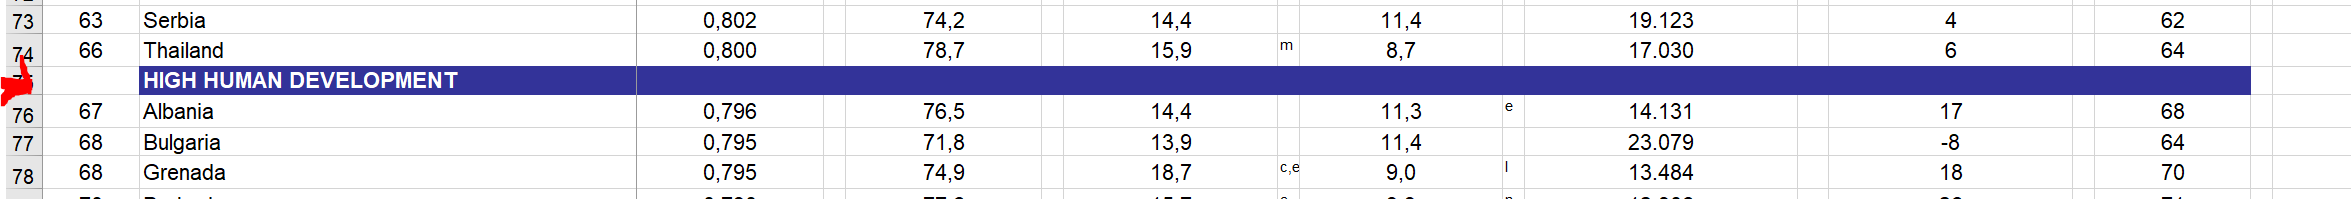

Vamos a detectar valores vacios y eliminar la fila, vemos que todos los datos que nos interesan están completos, así que esto sólo afectará a la lineas explicativas o cabeceras

Tomamos el rango de 60 a 69 y aplicamos un estilo a las celdas que son NaN. PAra ellos usamos apply. Como cada x es una fila entera, tenemos que hacer un bucle for (for v in x) si el valor es nan marcamos la celda en amarillo.

In [ ]:
styled = df_more_data.loc[60:69].style.apply(lambda x: ['background-color: yellow' if pd.isna(v) else '' for v in x], axis=1)
styled

,Country,HDI (2021),Mean years of schooling,GNI (2021)
60,Panama,0.805000,10.540590,26956.837070
61,Malaysia,0.803000,10.645060,26657.943550
62,Georgia,0.802000,12.822220,14664.168250
63,Mauritius,0.802000,10.427910,22025.346310
64,Serbia,0.802000,11.369870,19123.027470
65,Thailand,0.800000,8.697120,17030.153520
66,HIGH HUMAN DEVELOPMENT,nan,nan,nan
67,Albania,0.796000,11.286455,14131.110390
68,Bulgaria,0.795000,11.413180,23078.955950
69,Grenada,0.795000,9.032104,13483.577400


### Queremos eliminar todas estas filas:

In [ ]:

for index, row in df_more_data.iterrows():
  for cell in row:
     if (pd.isna(cell)):
        print(row.tolist())



['HIGH HUMAN DEVELOPMENT', nan, nan, nan]
['HIGH HUMAN DEVELOPMENT', nan, nan, nan]
['HIGH HUMAN DEVELOPMENT', nan, nan, nan]
['MEDIUM HUMAN DEVELOPMENT', nan, nan, nan]
['MEDIUM HUMAN DEVELOPMENT', nan, nan, nan]
['MEDIUM HUMAN DEVELOPMENT', nan, nan, nan]
['LOW HUMAN DEVELOPMENT', nan, nan, nan]
['LOW HUMAN DEVELOPMENT', nan, nan, nan]
['LOW HUMAN DEVELOPMENT', nan, nan, nan]
['OTHER COUNTRIES OR TERRITORIES', nan, nan, nan]
['OTHER COUNTRIES OR TERRITORIES', nan, nan, nan]
['OTHER COUNTRIES OR TERRITORIES', nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
['Human development groups', nan, nan, nan]
['Human development groups', nan, nan, nan]
['Human development groups', nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
[nan, nan, nan, nan]
['Regions', nan, nan, nan]
['Regions', nan, nan, nan]
['Regions', nan, nan, nan]
[nan

### Vamos a imprimir el resultado y analizarlos con missingno para ver si hay valores faltantes.

Valores nulos:  Country                    0
HDI (2021)                 0
Mean years of schooling    0
GNI (2021)                 0
dtype: int64


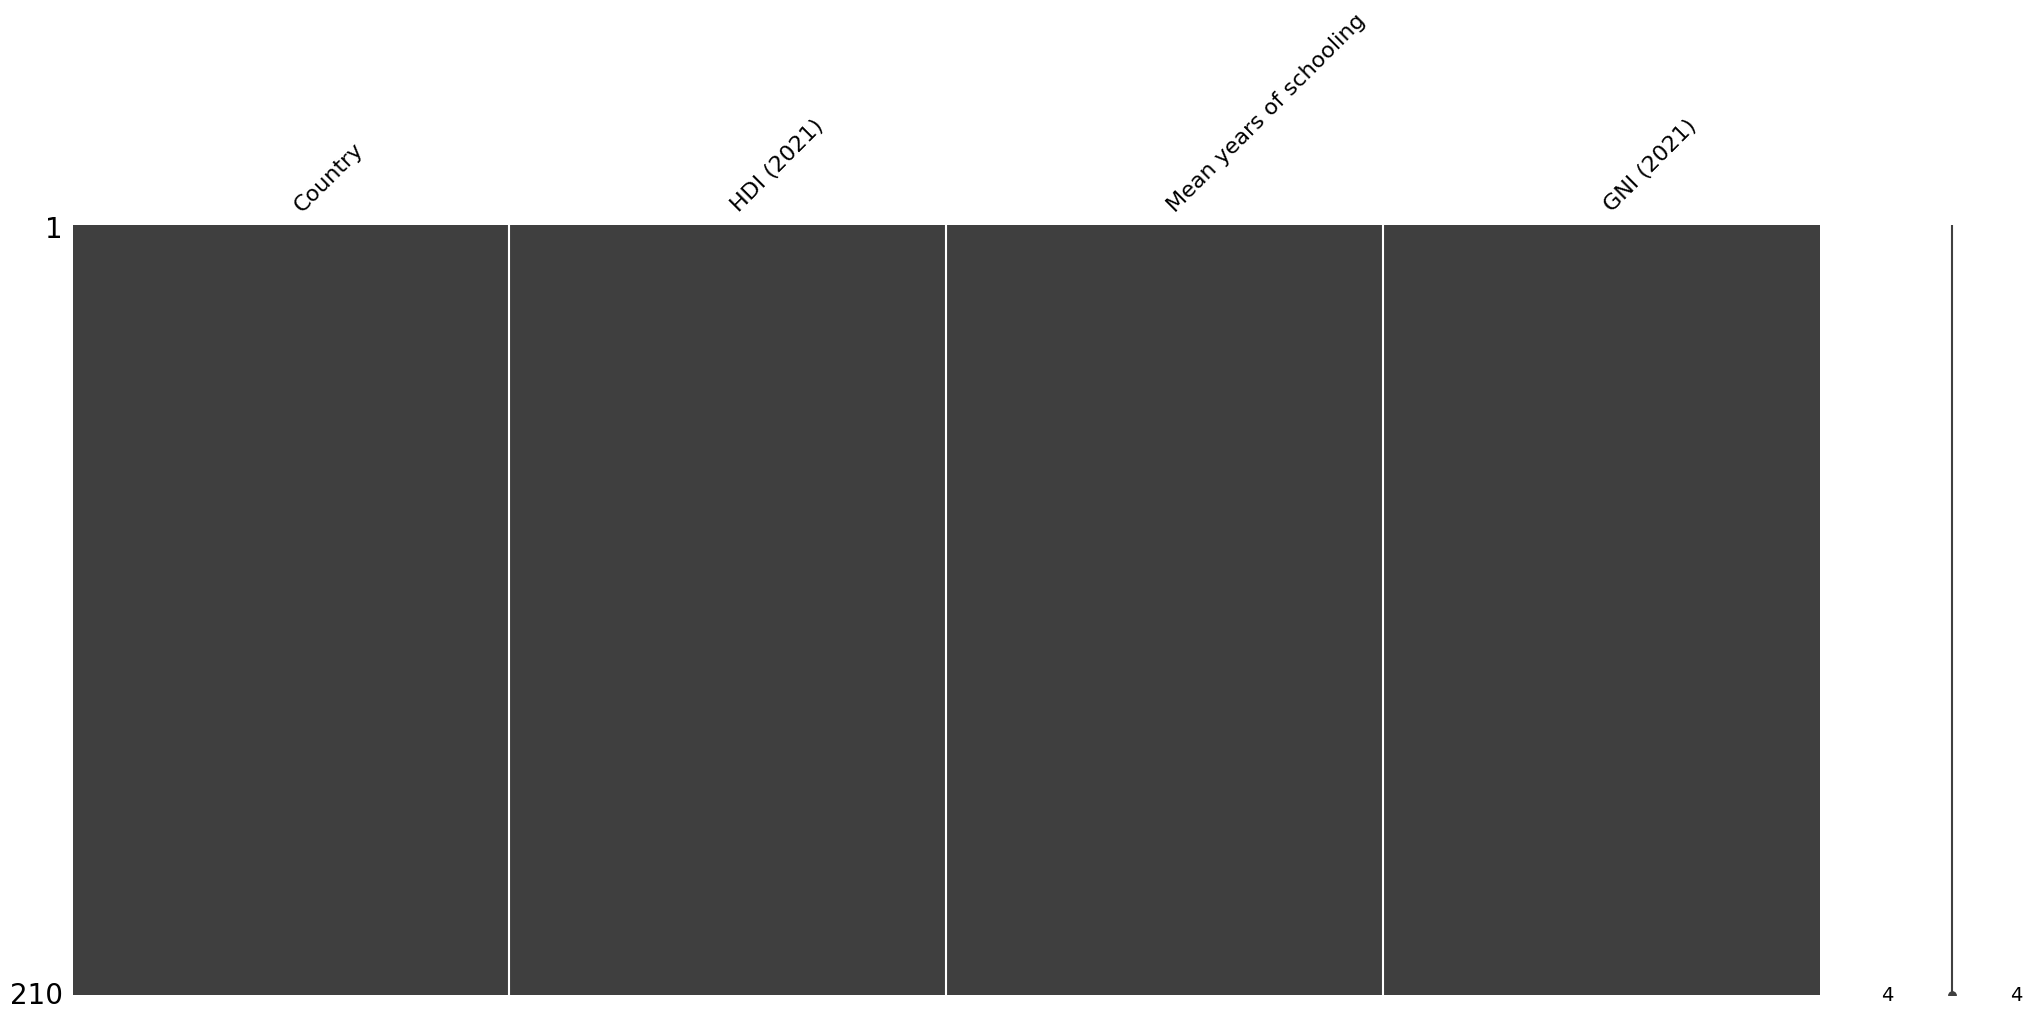

In [ ]:
df_more_data_cleaned = df_more_data.dropna()

for index, row in df_more_data_cleaned.iterrows():
  for cell in row:
     if (pd.isna(cell)):
        print(row.tolist())

# Vamos a imprimir el resultado y analizarlos con missingno para ver si hay valores faltantes.
msno.matrix(df_more_data_cleaned)
print("Valores nulos: ", df_more_data_cleaned.isnull().sum())


### Parece que no hay pero si examinamos mejor los datos podemos ver que hay valores faltantes identificados con "..."

In [ ]:
celdas_puntos = df_more_data_cleaned.isin(['..'])
rows_con_celdas_con_puntos = df_more_data_cleaned[celdas_puntos.any(axis=1)]
print(rows_con_celdas_con_puntos)

                                 Country HDI (2021) Mean years of schooling  \
195  Korea (Democratic People's Rep. of)         ..                      ..   
196                               Monaco         ..                      ..   
197                                Nauru         ..                      ..   
198                              Somalia         ..                      ..   

      GNI (2021)  
195           ..  
196           ..  
197  17729.74084  
198   1017.96785  


### vamos a eliminar aquellas columnas que no tienen datos. Para ello convertimos .. a NaN y limpiamos NaN

Valores nulos:  Country                    0
HDI (2021)                 4
Mean years of schooling    4
GNI (2021)                 2
dtype: int64


<Axes: >

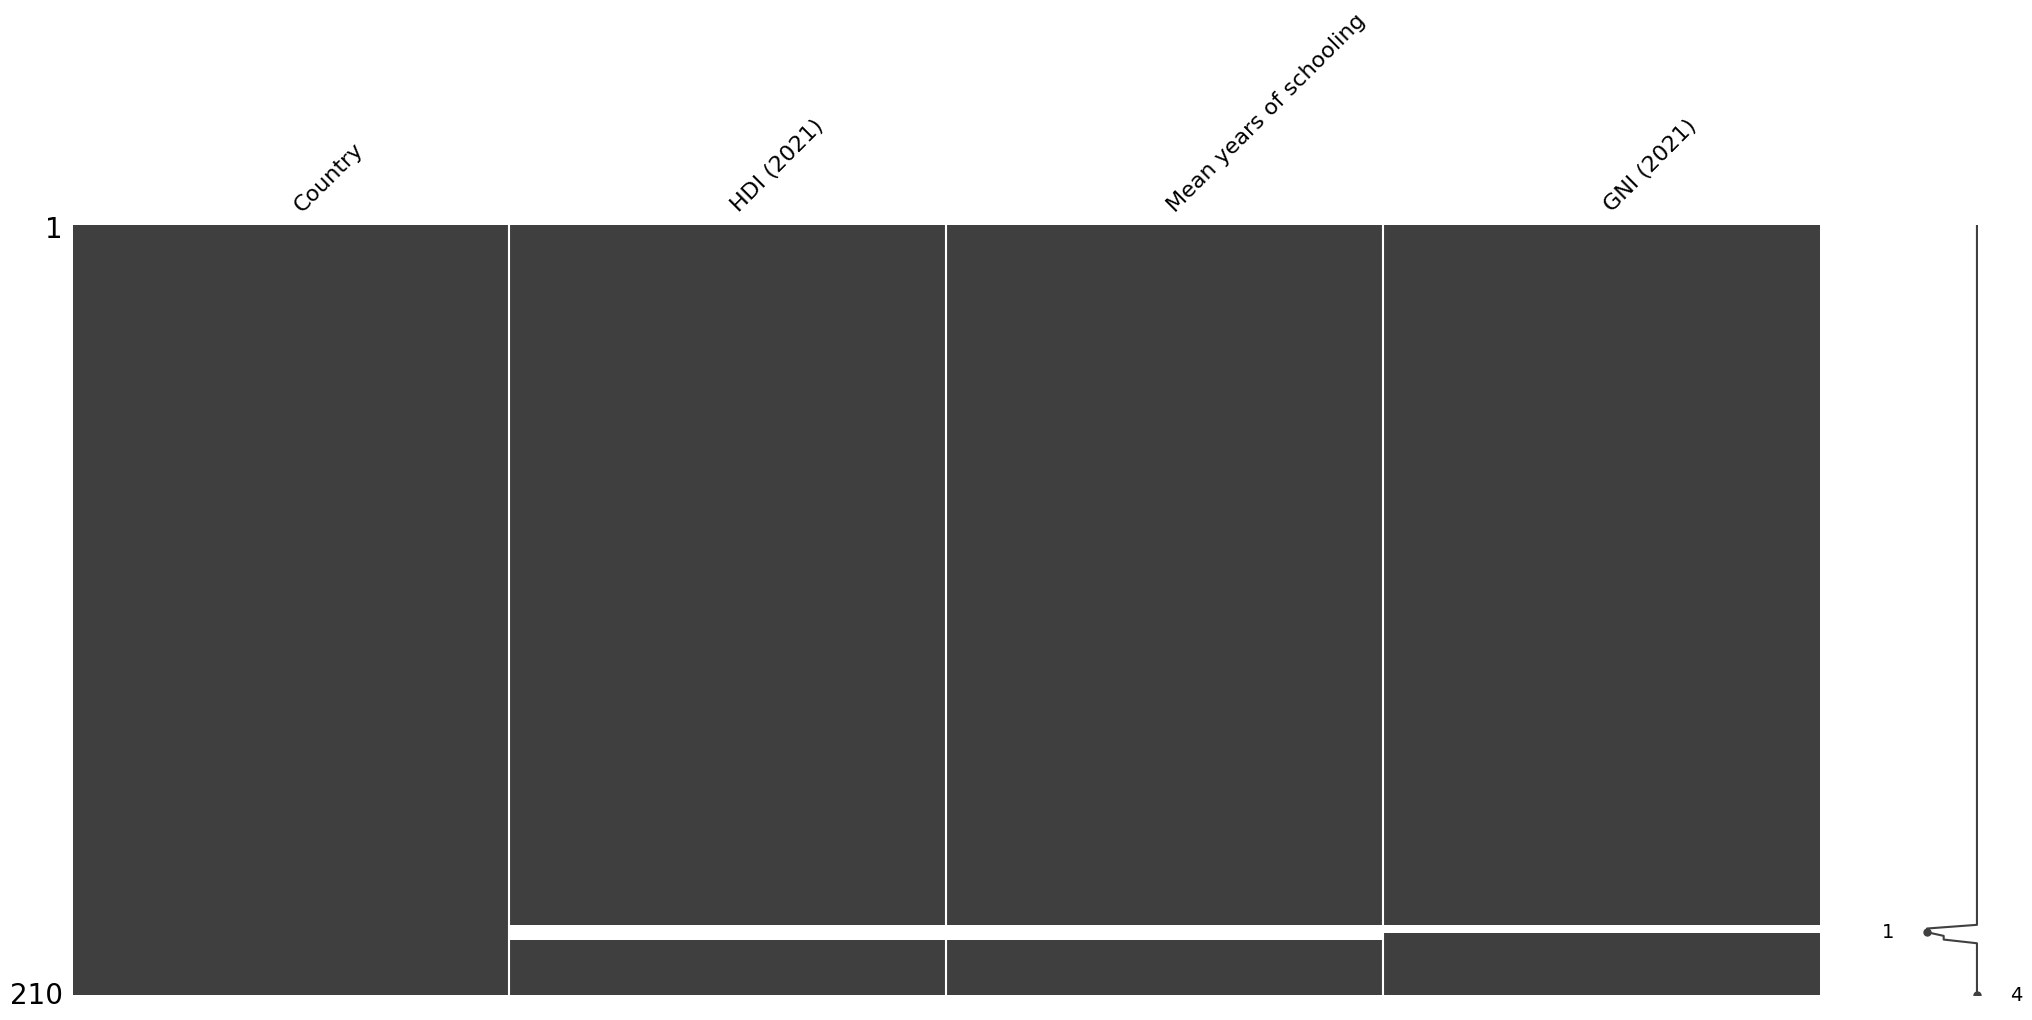

In [ ]:
df_more_data_cleaned.replace('..', np.nan, inplace=True)
print("Valores nulos: ", df_more_data_cleaned.isnull().sum())
msno.matrix(df_more_data_cleaned)

# Ahora vemos que tenemos algunos valores nulos por tanto eliminamos las filas

In [ ]:
df_more_data_cleaned.dropna(subset=['HDI (2021)', 'Mean years of schooling', 'GNI (2021)'],inplace=True)

# Volvemos al primer dataframe

### Vamos a obtener del ranking los cinco primeros y vamos a colorear los valores más altos de 'Average IQ', 'Literacy Rate' (Índice de alfabeticación), 'Nobel Prices', 'HDI (2021)' (Índice de desarrollo humano)

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #78c679' if v else '' for v in is_max]

styled_df = df.head().style.apply(highlight_max, subset=['Average IQ', 'Literacy Rate', 'Nobel Prices', 'HDI (2021)'])

styled_df

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.480000,Asia,0.990000,29,0.925000,13.400000,42274.000000,123294513
1,2,Taiwan,106.470000,Asia,0.960000,4,nan,nan,nan,10143543
2,3,Singapore,105.890000,Asia,0.970000,0,0.939000,11.900000,90919.000000,6014723
3,4,Hong Kong,105.370000,Asia,0.940000,1,0.952000,12.200000,62607.000000,7491609
4,5,China,104.100000,Asia,0.960000,8,0.768000,7.600000,17504.000000,1425671352


# Calidad de los datos

### Información general


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            193 non-null    int64  
 1   Country                         193 non-null    object 
 2   Average IQ                      193 non-null    float64
 3   Continent                       193 non-null    object 
 4   Literacy Rate                   193 non-null    float64
 5   Nobel Prices                    193 non-null    int64  
 6   HDI (2021)                      179 non-null    float64
 7   Mean years of schooling - 2021  179 non-null    float64
 8    GNI - 2021                     179 non-null    float64
 9   Population - 2023               193 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 15.2+ KB


### ¿Hay valores nulos?

In [ ]:
# Checking valores nulos
print("Valores nulos: ", df.isnull().sum())

Valores nulos:  Rank                               0
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       0
HDI (2021)                        14
Mean years of schooling - 2021    14
 GNI - 2021                       14
Population - 2023                  0
dtype: int64


### ¿Hay valores en blanco (cadena str "" vacía)?

In [ ]:
print(df.apply(lambda col: col[col > 100].count() if col.dtype == 'int' else 0))

Rank                              93
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       3
HDI (2021)                         0
Mean years of schooling - 2021     0
 GNI - 2021                        0
Population - 2023                  0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            193 non-null    int64  
 1   Country                         193 non-null    object 
 2   Average IQ                      193 non-null    float64
 3   Continent                       193 non-null    object 
 4   Literacy Rate                   193 non-null    float64
 5   Nobel Prices                    193 non-null    int64  
 6   HDI (2021)                      179 non-null    float64
 7   Mean years of schooling - 2021  179 non-null    float64
 8    GNI - 2021                     179 non-null    float64
 9   Population - 2023               193 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 15.2+ KB


### ¿Hay duplicados?

In [ ]:
print("Número de duplicados: " + str(df.duplicated().sum()))

Número de duplicados: 0


### ¿Hay valores negativos en las columnas numéricas?

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])
# Contar los valores negativos en las columnas numéricas
count_negatives = numeric_columns.apply(lambda x: (x < 0).sum())
print('---- Valores Negativos ----')
print(count_negatives)

---- Valores Negativos ----
Rank                              0
Average IQ                        0
Literacy Rate                     0
Nobel Prices                      0
HDI (2021)                        0
Mean years of schooling - 2021    0
 GNI - 2021                       0
dtype: int64


### Checkeamos percentiles (data skew)

In [ ]:
# Analizando por debajo del percentil 10 y por encima del 90
percentile_10th = df['Average IQ'].quantile(0.01)
print(percentile_10th)
percentile_90th = df['Average IQ'].quantile(0.99)
outliers_10th = df[df['Average IQ'] < percentile_10th]
outliers_90th = df[df['Average IQ'] > percentile_90th]
print("Percentil 10\n", outliers_10th)
print("PErcentil 90\n", outliers_90th)

45.07
Percentil 10
      Rank Country  Average IQ Continent  Literacy Rate  Nobel Prices  \
192   193   Nepal       42.99      Asia           0.65             0   

     HDI (2021)  Mean years of schooling - 2021   GNI - 2021 Population - 2023  
192       0.602                             5.1       3877.0          30896590  
PErcentil 90
    Rank Country  Average IQ Continent  Literacy Rate  Nobel Prices  \
0     1   Japan      106.48      Asia           0.99            29   
1     2  Taiwan      106.47      Asia           0.96             4   

   HDI (2021)  Mean years of schooling - 2021   GNI - 2021 Population - 2023  
0       0.925                            13.4      42274.0         123294513  
1         NaN                             NaN          NaN          10143543  


# Librería missingno
### Visualización de datos faltantes

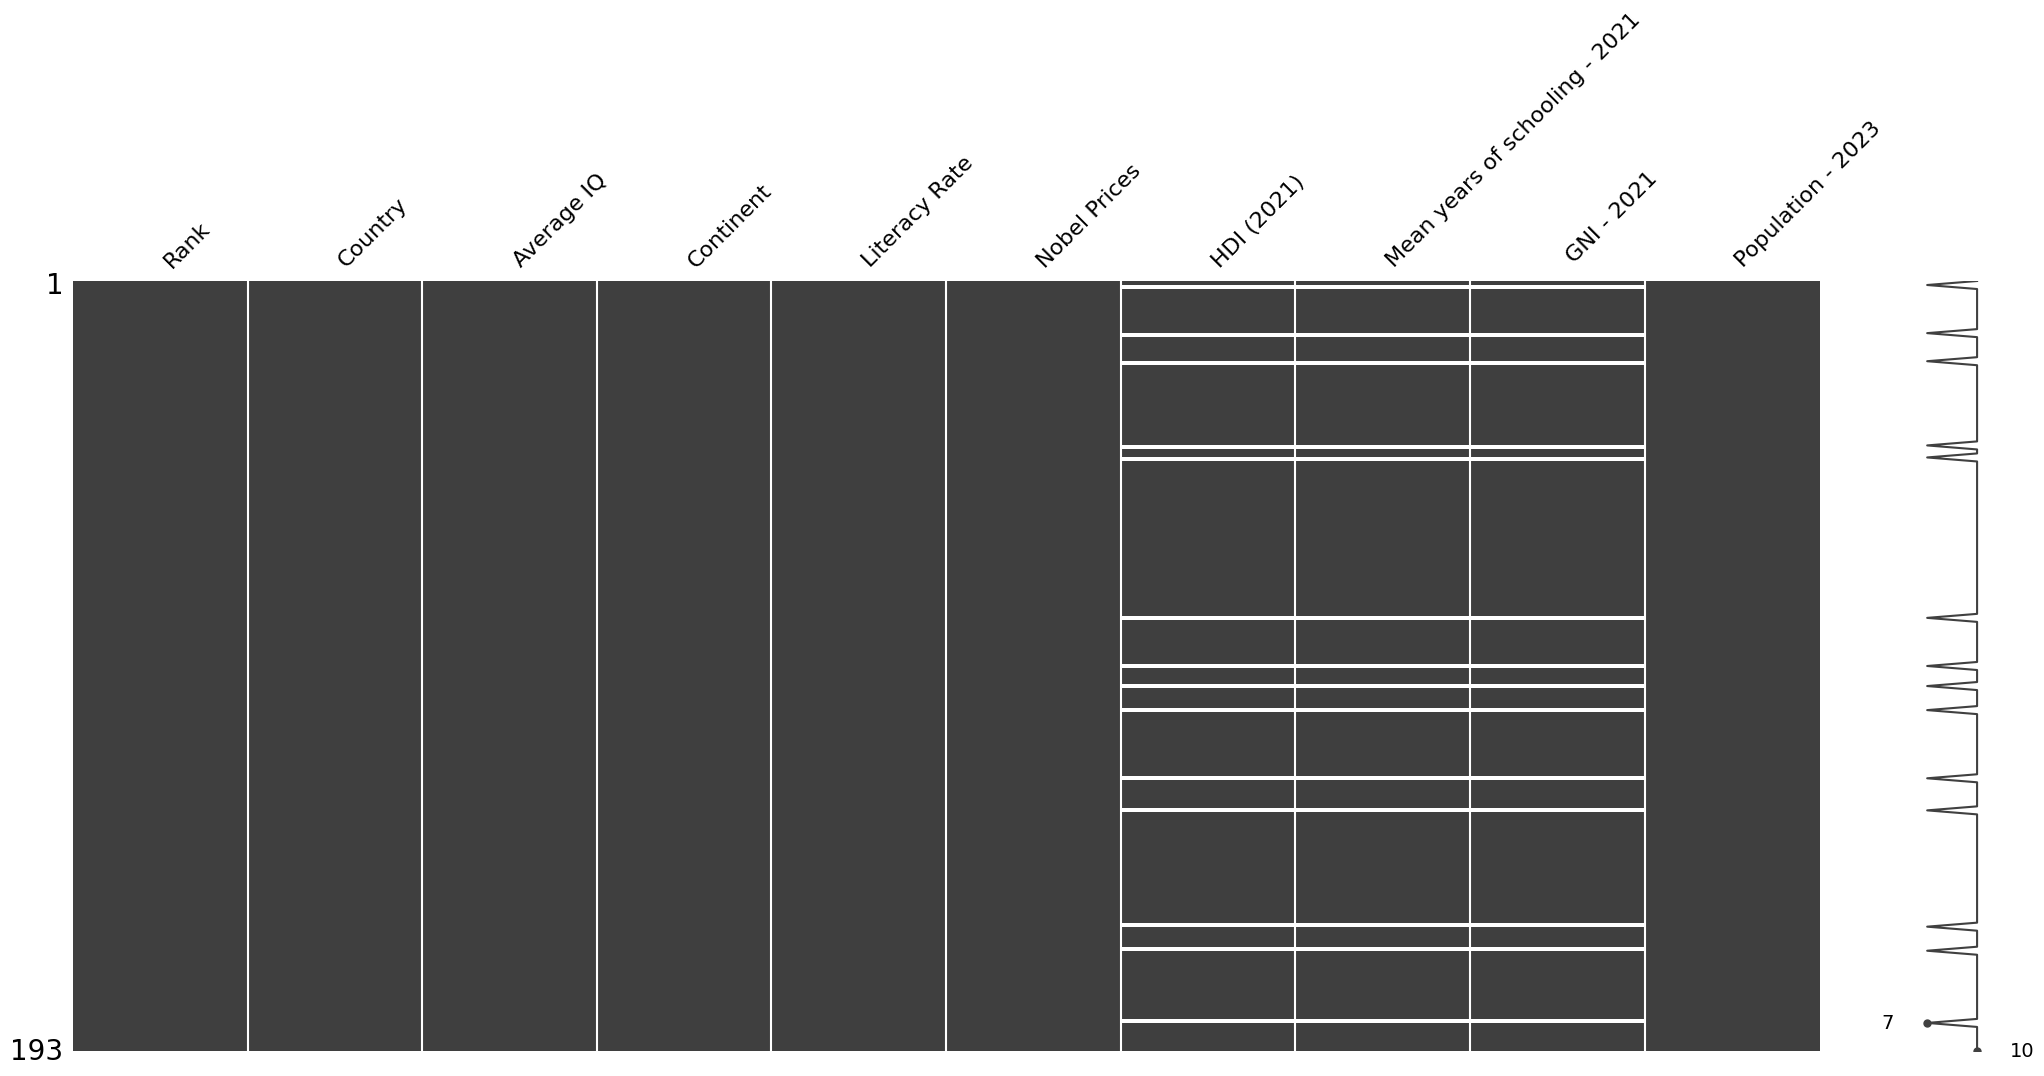

In [ ]:
msno.matrix(df);

In [ ]:
df.isnull().sum()

Rank                               0
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       0
HDI (2021)                        14
Mean years of schooling - 2021    14
 GNI - 2021                       14
Population - 2023                  0
dtype: int64

# Entonces tenemos 14 registros en blanco. Vamos a ver si podemos complementarlos con el dataset df_more_data_cleaned
    Iterar sobre cada fila del primer DataFrame.
    Para cada país en el primer DataFrame, comprobar si hay datos faltantes.
    Si hay datos faltantes, buscar ese país en el segundo DataFrame.
    Si el país se encuentra en el segundo DataFrame, usar los datos de allí para completar los faltantes en el primer DataFrame.

### Tenemos un problema con una de las cabeceras. ' GNI - 2021' tiene un espacio en blanco al principio. Para corregir esto, y que no nos traiga problemas, vamos a usar strip()

In [ ]:
df.columns = df.columns.str.strip()

#### Iteramos con iterrows pero desafortunadamente el fichero de la UN también carece de datos para estos países.

In [ ]:

# Iterar sobre cada fila del primer DataFrame
for index, row in df.iterrows():
    # Comprobar si hay datos faltantes en las columnas de interés
    if pd.isna(row['HDI (2021)']) or pd.isna(row['Mean years of schooling - 2021']) or pd.isna(row['GNI - 2021']):
        print("Faltan datos en " + row['Country'])
        # Buscar el país en el segundo DataFrame
        match = df_more_data_cleaned[df_more_data_cleaned['Country'] == row['Country']]

        # Si el país se encuentra en el segundo DataFrame y tiene los datos necesarios
        if not match.empty:
            # Completar los datos faltantes
            if pd.isna(row['HDI (2021)']) and 'HDI (2021)' in match.columns:
                df.at[index, 'HDI (2021)'] = match['HDI (2021)'].values[0]

            if pd.isna(row['Mean years of schooling - 2021']) and 'Mean years of schooling' in match.columns:
                df.at[index, 'Mean years of schooling - 2021'] = match['Mean years of schooling'].values[0]

            if pd.isna(row['GNI - 2021']) and 'GNI (2021)' in match.columns:
                df.at[index, 'GNI - 2021'] = match['GNI (2021)'].values[0]

        else:
          print("-- No hay datos nuevos para " + row['Country'] + "\n")

# df1 ahora tiene los datos faltantes completados usando los datos de df2


Faltan datos en Taiwan
-- No hay datos nuevos para Taiwan

Faltan datos en Macao
-- No hay datos nuevos para Macao

Faltan datos en North Korea
-- No hay datos nuevos para North Korea

Faltan datos en New Caledonia
-- No hay datos nuevos para New Caledonia

Faltan datos en Bermuda
-- No hay datos nuevos para Bermuda

Faltan datos en Turks and Caicos Islands
-- No hay datos nuevos para Turks and Caicos Islands

Faltan datos en Cayman Islands
-- No hay datos nuevos para Cayman Islands

Faltan datos en Puerto Rico
-- No hay datos nuevos para Puerto Rico

Faltan datos en Northern Mariana Islands
-- No hay datos nuevos para Northern Mariana Islands

Faltan datos en East Timor
-- No hay datos nuevos para East Timor

Faltan datos en British Virgin Islands
-- No hay datos nuevos para British Virgin Islands

Faltan datos en Saint Helena
-- No hay datos nuevos para Saint Helena

Faltan datos en Somalia
-- No hay datos nuevos para Somalia

Faltan datos en Costa do Marfim
-- No hay datos nuevos pa

In [ ]:

df.describe().T.sort_values(by=['std','min'] , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
GNI - 2021,179.000000,20811.798883,22160.494888,732.000000,4593.000000,12672.000000,30588.000000,146830.000000
Rank,193.000000,97.000000,55.858452,1.000000,49.000000,97.000000,145.000000,193.000000
Nobel Prices,193.000000,5.922280,31.971328,0.000000,0.000000,0.000000,1.000000,400.000000
Average IQ,193.000000,82.047927,13.336117,42.990000,74.330000,82.240000,91.600000,106.480000
Mean years of schooling - 2021,179.000000,9.028492,3.187867,2.100000,6.400000,9.400000,11.600000,14.100000
Literacy Rate,193.000000,0.864249,0.180262,0.190000,0.800000,0.950000,0.990000,1.000000
HDI (2021),179.000000,0.724123,0.152761,0.385000,0.599500,0.745000,0.844000,0.962000


In [ ]:
for column in df.columns:
    total_values_column = len(df[column])
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values in {total_values_column}")
print(f" Países repetidos { len(df['Country'].unique()) } en { len(df['Country']) }")

Rank: 193 distinct values in 193
Country: 193 distinct values in 193
Average IQ: 173 distinct values in 193
Continent: 8 distinct values in 193
Literacy Rate: 52 distinct values in 193
Nobel Prices: 22 distinct values in 193
HDI (2021): 154 distinct values in 193
Mean years of schooling - 2021: 86 distinct values in 193
GNI - 2021: 180 distinct values in 193
Population - 2023: 192 distinct values in 193
 Países repetidos 193 en 193


## Exploratory Data Analysis (EDA)

* Cleaning Data - Eliminamos las puntuaciones de la valores de población y los convertimos a int64

In [ ]:
def clean_data(df):
    df['Population - 2023'] = df['Population - 2023'].str.replace('[,.]', '', regex=True)
    # Change column type to int64 for column: 'Population - 2023'
    df = df.astype({'Population - 2023': 'int64'})
    return df

df_clean = clean_data(df.copy())

## Visualización

In [ ]:
df1 = df_clean.copy()

### Análisis univariable

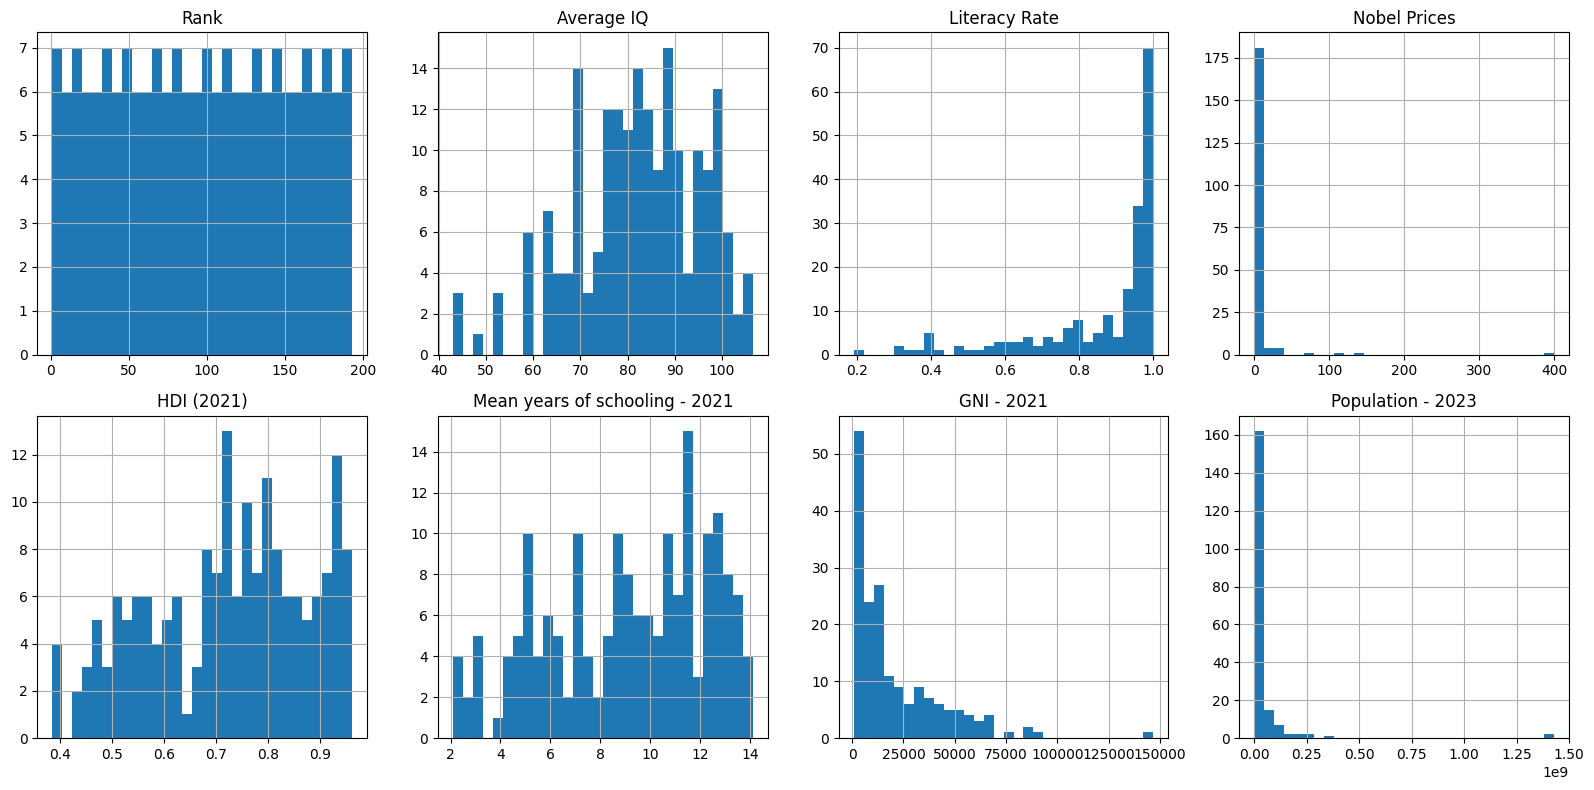

In [ ]:

df1.hist(layout=(2, 4), bins=30, figsize=(16, 8))
plt.tight_layout()
plt.show()

### O bien obtener los datos de una sola columna

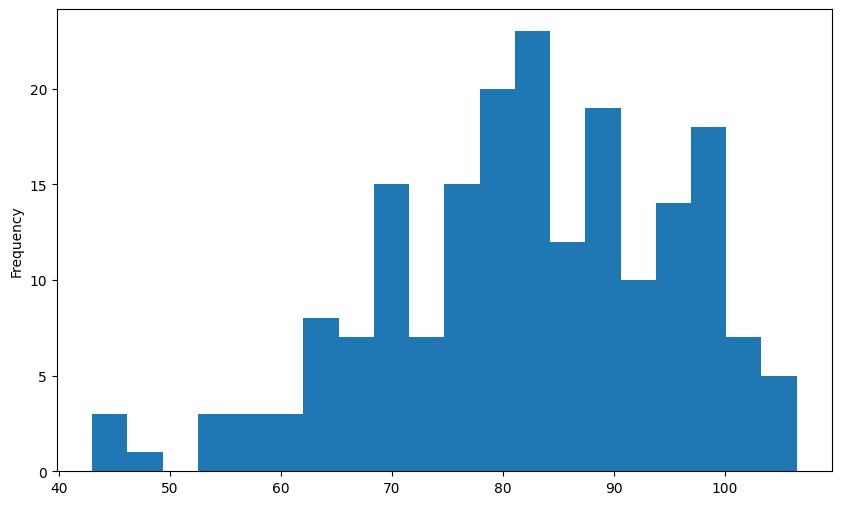

In [ ]:
df['Average IQ'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.show()

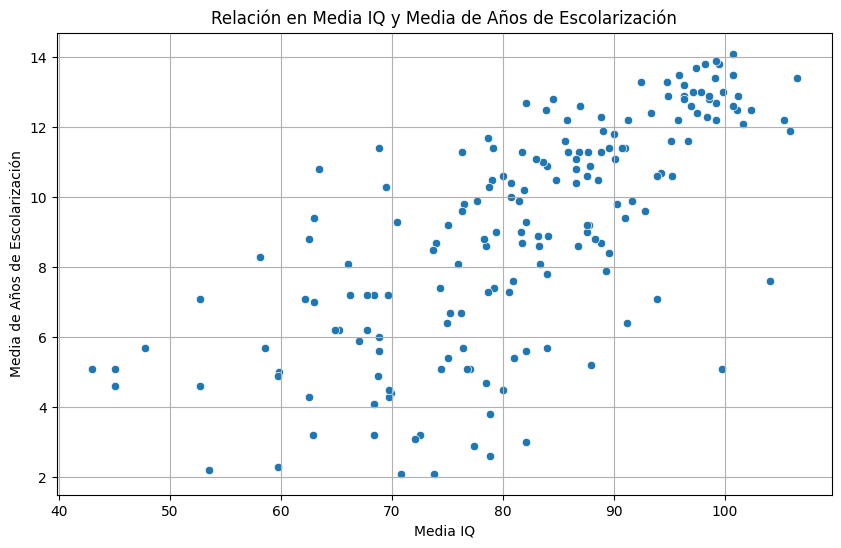

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Average IQ', y='Mean years of schooling - 2021')

# Añadimos titulo y leyendas
plt.title('Relación en Media IQ y Media de Años de Escolarización')
plt.xlabel('Media IQ')
plt.ylabel('Media de Años de Escolarización')
plt.grid(True)

# Show plot
plt.show()


### Anlísis Bivariable

In [ ]:
rank_location = df1[['Country', 'Average IQ']]

rank_location['ISO_alpha'] = rank_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(rank_location, how='left', left_on='iso_a3', right_on='ISO_alpha')

fig = px.choropleth(
    world,
    locations='iso_a3',
    color='Average IQ',
    color_continuous_scale='YlOrRd',
    labels={'Average IQ': 'Average IQ'},
    title='Rank by Country'
)

fig.show()


### Examinar la distribución de los datos

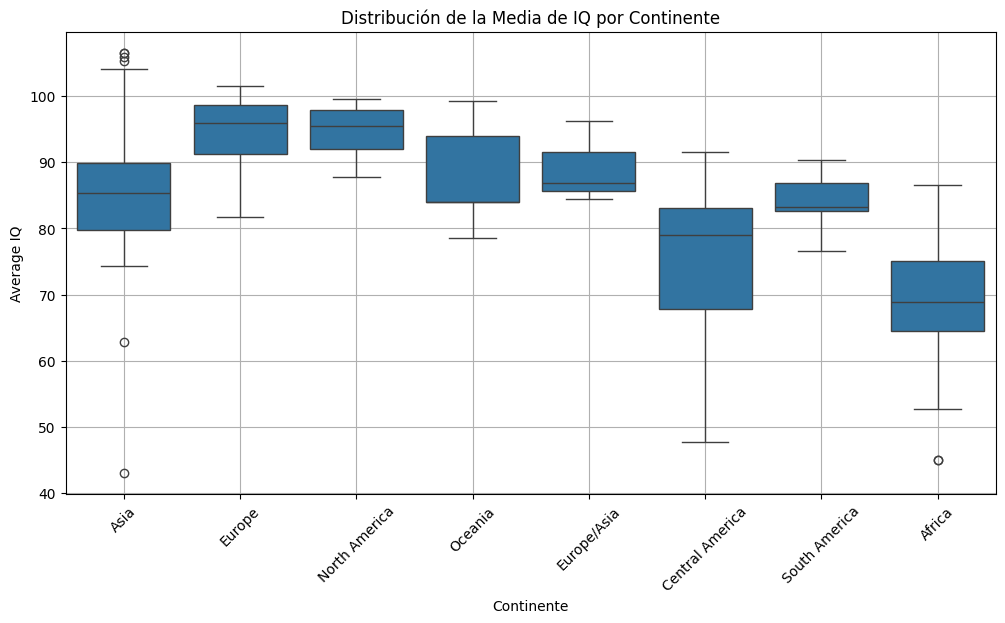

In [ ]:
# Crear un boxplot para examinar la distribución de la media de IQ por continente

plt.figure(figsize=(12, 6))

sns.boxplot(data=df1, x='Continent', y='Average IQ')

# Añadir detalles al gráfico

plt.title('Distribución de la Media de IQ por Continente')
plt.xlabel('Continente')
plt.ylabel('Average IQ')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Enriquecimiento de datos - Complementarios

In [ ]:
gasto_educacion = pd.read_csv('https://drive.google.com/uc?export=download&id=10a4935pfdhK8jwkHQf5rM3hWp137G5cT')
print(gasto_educacion.columns)

Index(['Economy', 'Year', 'Economy Code',
       'Government expenditure on education, total (% of GDP)'],
      dtype='object')


In [ ]:



# Merge externo
merged_df = pd.merge(df1, gasto_educacion, left_on='Country', right_on='Economy', how='outer', indicator=True)

# Identificar no correspondencias
sin_equivalencia_df1 = merged_df[merged_df['_merge'] == 'left_only']

# Crear tabla de equivalencias
tabla_equivalencias = merged_df[['Country', 'Economy']]
tabla_equivalencias['Equivalencia'] = merged_df['_merge'].apply(lambda x: 'Sí' if x == 'both' else 'No')

# Mostrar resultados
print("Elementos sin equivalencia en df1:")
print(sin_equivalencia_df1[['Country']])

print("\nTabla de Equivalencias:")
print(tabla_equivalencias)

Elementos sin equivalencia en df1:
          Country
1          Taiwan
3       Hong Kong
128     Palestine
161  Saint Helena

Tabla de Equivalencias:
       Country                Economy Equivalencia
0        Japan                  Japan           Sí
1       Taiwan                    NaN           No
2    Singapore              Singapore           Sí
3    Hong Kong                    NaN           No
4        China                  China           Sí
..         ...                    ...          ...
216        NaN                  Tonga           No
217        NaN                 Tuvalu           No
218        NaN  Virgin Islands (U.S.)           No
219        NaN                  Samoa           No
220        NaN                 Kosovo           No

[221 rows x 3 columns]


### Después de revisar las diferencias y corregir los nombres de los países para que sean iguales vamos a hacer un merge:


In [ ]:
df2 = pd.merge(df1, gasto_educacion, left_on='Country', right_on='Economy', how='inner', indicator=True)

df2.to_excel("merged_with_expense_on_education.xlsx", index=False)

### Ahora que hemos enriquecido los datos veamos la realción entre Media IQ y gasto en educación

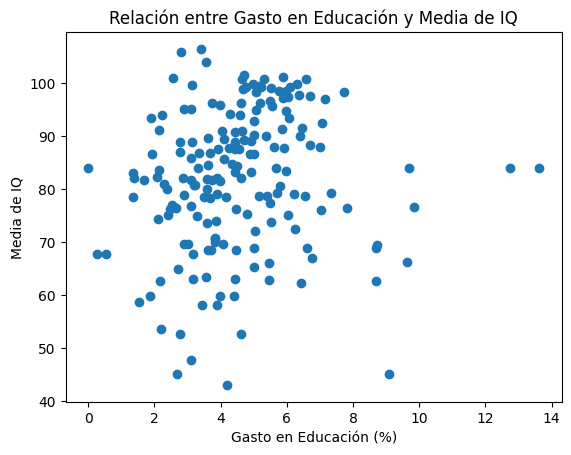

In [ ]:
plt.scatter(df2['Government expenditure on education, total (% of GDP)'], df2['Average IQ'])
plt.title('Relación entre Gasto en Educación y Media de IQ')
plt.xlabel('Gasto en Educación (%)')
plt.ylabel('Media de IQ')
plt.show()

#### Vamos a añadir una línea de dispersión usandos la regresión lineal

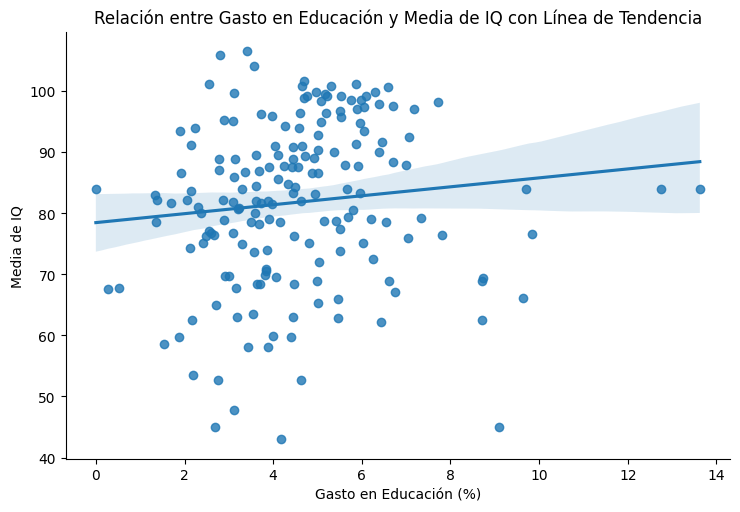

In [ ]:
sns.lmplot(x='Government expenditure on education, total (% of GDP)', y='Average IQ', data=df2, aspect=1.5)
plt.title('Relación entre Gasto en Educación y Media de IQ con Línea de Tendencia')
plt.xlabel('Gasto en Educación (%)')
plt.ylabel('Media de IQ')
plt.show()

### Estilo Cuadrnate mágico

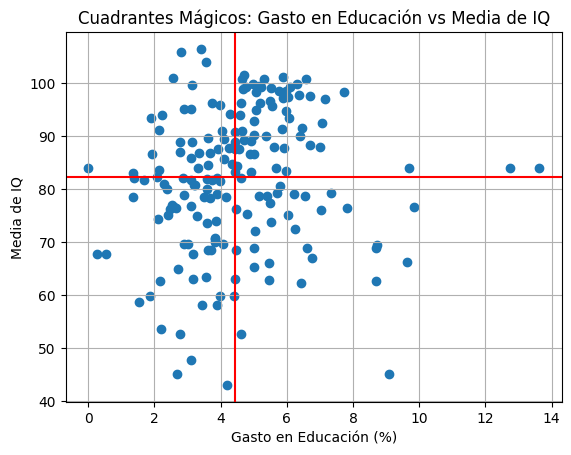

In [ ]:
# Definir los valores centrales (puede ser la media o la mediana)
centro_x = df2['Government expenditure on education, total (% of GDP)'].median()
centro_y = df2['Average IQ'].median()

plt.scatter(df2['Government expenditure on education, total (% of GDP)'], df2['Average IQ'])
plt.axhline(y=centro_y, color='r', linestyle='-') # Línea horizontal
plt.axvline(x=centro_x, color='r', linestyle='-') # Línea vertical

plt.title('Cuadrantes Mágicos: Gasto en Educación vs Media de IQ')
plt.xlabel('Gasto en Educación (%)')
plt.ylabel('Media de IQ')
plt.grid(True)

In [ ]:
#Barchart
import plotly.graph_objects as go

rank_by_country = df1.sort_values(by='Rank')

fig = go.Figure()
fig.add_trace(go.Bar(x=rank_by_country['Country'], y=rank_by_country['Rank']))

fig.update_layout(
    title="Ranking de Países",
    xaxis_title='País',
    yaxis_title='Rank',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

fig.show(renderer="colab")

In [ ]:
iq_location = df1[['Country', 'Average IQ']]

iq_location['ISO_alpha'] = iq_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(iq_location, how='left', left_on='iso_a3', right_on='ISO_alpha')

fig_geo = px.choropleth(
    world,
    locations='iso_a3',
    color='Average IQ',
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels={'Media IQ': 'Media IQ'},
    title='Media IQ por País'
)

fig_geo.show(renderer="colab")


In [ ]:
# Bar Chart
top20_iq_by_country = df1.sort_values(by='Average IQ', ascending=False).head(20)

fig_bar_top20 = go.Figure()
fig_bar_top20.add_trace(go.Bar(x=top20_iq_by_country['Country'], y=top20_iq_by_country['Average IQ']))

fig_bar_top20.update_layout(
    title="Top 20 Países por Media IQ",
    xaxis_title='País',
    yaxis_title='Media IQ',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

fig_bar_top20.show(renderer="colab")


In [ ]:
average_iq_by_continent = df1.groupby(['Continent'])[['Average IQ']].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=average_iq_by_continent['Continent'], y=average_iq_by_continent['Average IQ']))

fig.update_layout(
    title="Media IQ por Continente",
    xaxis_title='Continente',
    yaxis_title='Media IQ',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

fig.show(renderer="colab")


In [ ]:
top_nobel_prices = df1.sort_values(by='Nobel Prices', ascending=False).head(20)

fig = go.Figure()
fig.add_trace(go.Bar(x=top_nobel_prices['Country'], y=top_nobel_prices['Nobel Prices']))

fig.update_layout(
    title="Top 20 Países con el mayor número de premios Noble",
    xaxis_title='País',
    yaxis_title='Número de premios',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

fig.show(renderer="colab")


In [ ]:
population_location = df1[['Country', 'Population - 2023']]

population_location['ISO_alpha'] = population_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(population_location, how='left', left_on='iso_a3', right_on='ISO_alpha')

fig = px.choropleth(
    world,
    locations='iso_a3',
    color='Population - 2023',
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels={'Población - 2023': 'Población - 2023'},
    title='Población - 2023 por País'
)

fig.show(renderer="colab")


In [ ]:
#Barchart
top_population = df1.sort_values(by='Population - 2023', ascending=False).head(20)

fig = go.Figure()
fig.add_trace(go.Bar(x=top_population['Country'], y=top_population['Population - 2023']))

fig.update_layout(
    title="Top 20 Países de mayor población 2023",
    xaxis_title='País',
    yaxis_title='Población en 2023',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

fig.show(renderer="colab")


* Univariate Analysis

In [ ]:
top20_hdi_lc_by_country = df1.sort_values(by='HDI (2021)', ascending=False).head(20)

fig_bar_top20 = go.Figure()

fig_bar_top20.add_trace(go.Bar(x=top20_hdi_lc_by_country['Country'], y=top20_hdi_lc_by_country['HDI (2021)'], name='HDI (2021)'))

fig_bar_top20.add_trace(go.Bar(x=top20_hdi_lc_by_country['Country'], y=top20_hdi_lc_by_country['Literacy Rate'], name='Literacy Rate'))

fig_bar_top20.update_layout(
    title="Top 20 Países por Índice de desarrollo humano HDI (2021) y Tasa de alfabetización",
    xaxis_title='País',
    yaxis_title='Value',
    barmode='group',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

pyo.init_notebook_mode(connected=True)
fig_bar_top20.show(renderer="colab")


In [ ]:
scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(
    x=df1['HDI (2021)'],
    y=df1['Average IQ'],
    mode='markers',
    marker=dict(size=10),
    text=df1['Country'],
    name='Scatter Plot'
))

scatter_fig.update_layout(
    title="Scatter Plot Índice de desarrollo humano vs Media IQ",
    xaxis_title='HDI (2021)',
    yaxis_title='Media IQ',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

scatter_fig.show(renderer="colab")


In [ ]:
scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(
    x=df1['Mean years of schooling - 2021'],
    y=df1['Average IQ'],
    mode='markers',
    marker=dict(size=10),
    text=df1['Country'],
    name='Scatter Plot'
))

scatter_fig.update_layout(
    title="Scatter Plot of Media años de escolarización - 2021 vs Media IQ",
    xaxis_title='Años de escolarización ',
    yaxis_title='Media IQ',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

scatter_fig.show(renderer="colab")


In [ ]:
scatter_fig = go.Figure()

scatter_fig.add_trace(go.Scatter(
    x=df1['Literacy Rate'],
    y=df1['Average IQ'],
    mode='markers',
    marker=dict(size=10),
    text=df1['Country'],
    name='Scatter Plot'
))

scatter_fig.update_layout(
    title="Scatter Plot Tasa alfabetización VS Media IQ",
    xaxis_title='Tasa alfabetización',
    yaxis_title='Media IQ',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#b0deba',
    font=dict(color='black')
)

scatter_fig.show(renderer="colab")


### Destancando un país concreto:

In [ ]:
# Definiendo un color base y un color de destacado
color_base = 'blue'
color_destacado = 'red'
pais_destacado = 'Spain'

# Creando una lista de colores para cada país
colores = [color_destacado if pais == pais_destacado else color_base for pais in rank_by_country['Country']]

# Creando el gráfico de barras
fig = go.Figure()
fig.add_trace(go.Bar(
    x=rank_by_country['Country'],
    y=rank_by_country['Rank'],
    marker_color=colores  # Asignando los colores
))

# Configuraciones del layout
fig.update_layout(
    xaxis=dict(
        tickangle=-45,  # Rotar las etiquetas a -45 grados
        tickfont=dict(size=10)  # Ajustar el tamaño del texto si es necesario
    ),
    title="Ranking de Países",
    xaxis_title='País',
    yaxis_title='Rank',
    plot_bgcolor='#b0deba',
    paper_bgcolor='#FFF',
    font=dict(color='black'),

)

fig.show(renderer = 'colab')

## Correlation matrix

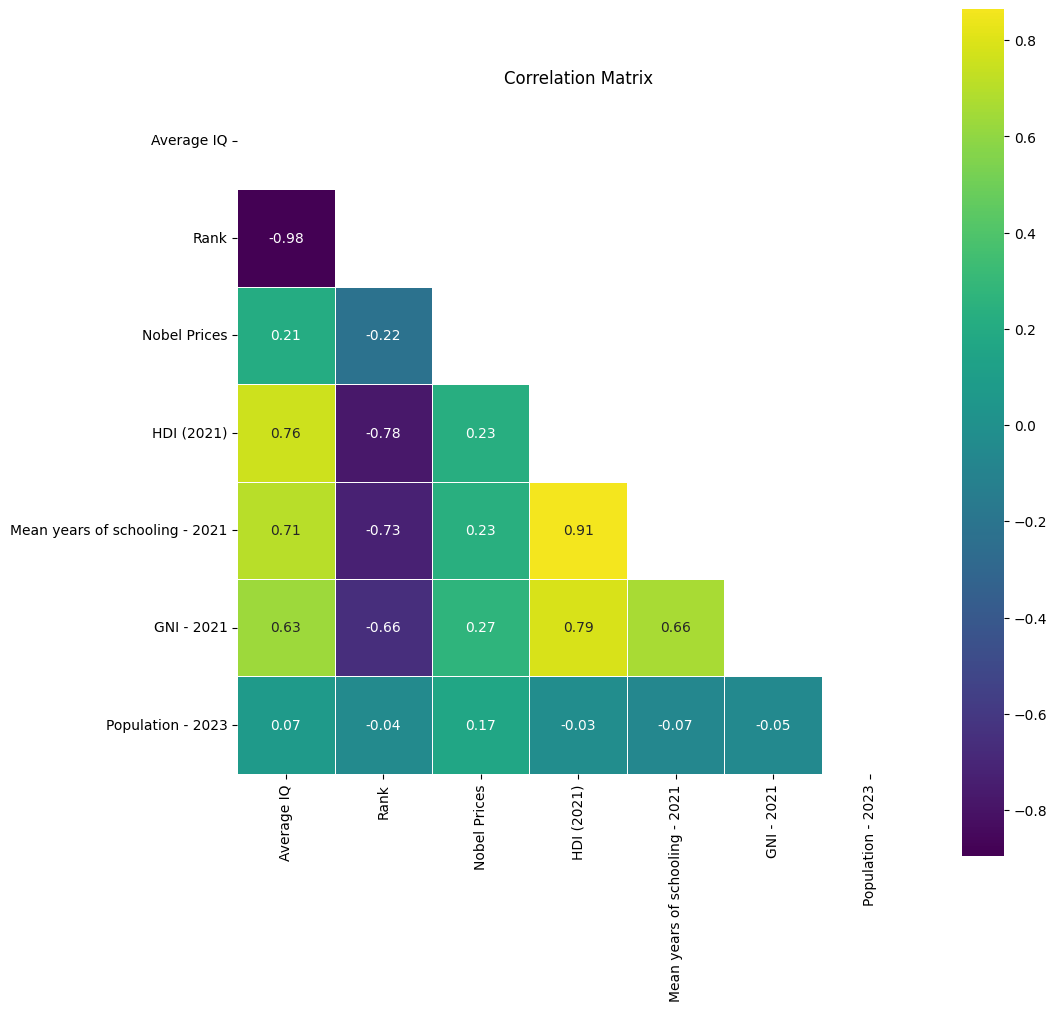

In [ ]:
selected_columns = df1[['Average IQ','Rank', 'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021', 'GNI - 2021', 'Population - 2023']]
selected_corr = selected_columns.corr()

plt.figure(figsize=(11, 11))
mask = np.triu(np.ones_like(selected_corr, dtype=bool))
sns.heatmap(selected_corr, mask=mask, robust=True, center=0, square=True, cmap="viridis", linewidths=0.6, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df2 = df1.copy()

In [ ]:
df2 = df2.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
X = df2[['Rank','Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021', 'GNI - 2021', 'Population - 2023']]
y = df2['Average IQ']

 ## PCA and StandardScaler

In [ ]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [ ]:
decom = PCA(svd_solver='auto')
X_pca = decom.fit_transform(X_scaled)

In [ ]:
ex_var = np.cumsum(np.round(decom.explained_variance_ratio_, 2) * 100)

<Axes: >

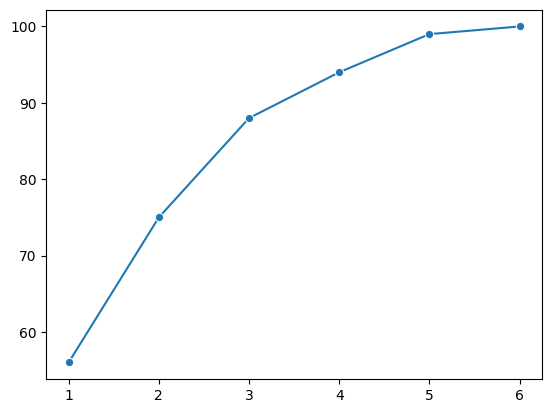

In [ ]:
sns.lineplot(y=ex_var, x=np.arange(1, len(ex_var) + 1), marker='o')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Clustring Models

In [ ]:
# 1. Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [ ]:
# 2. Regrasión de crestas (Tikhonov)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


In [ ]:
# 3. Regresión Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


In [ ]:
# 4. Regresión arbol de decisión
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
y_pred_tree = decision_tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)


In [ ]:
# 5. Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred_forest = random_forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)


In [ ]:
results_df3 = pd.DataFrame(index=['Regresión Lineal', 'Regrasión de crestas', 'Regresión Lasso', 'Decision Tree', 'Random Forest'])

results_df3['Mean Squared Error'] = [
    mse_linear,
    mse_ridge,
    mse_lasso,
    mse_tree,
    mse_forest
]



In [ ]:
results_df3['R-squared'] = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_forest)
]

print(results_df3)


                   Mean Squared Error  R-squared
Linear Regression            4.842537   0.958485
Ridge Regression             4.545631   0.961030
Lasso Regression             5.211883   0.955319
Decision Tree               19.053897   0.836651
Random Forest                6.510389   0.944186


* LA regresión de crestas es el mejor modelo con 0,96

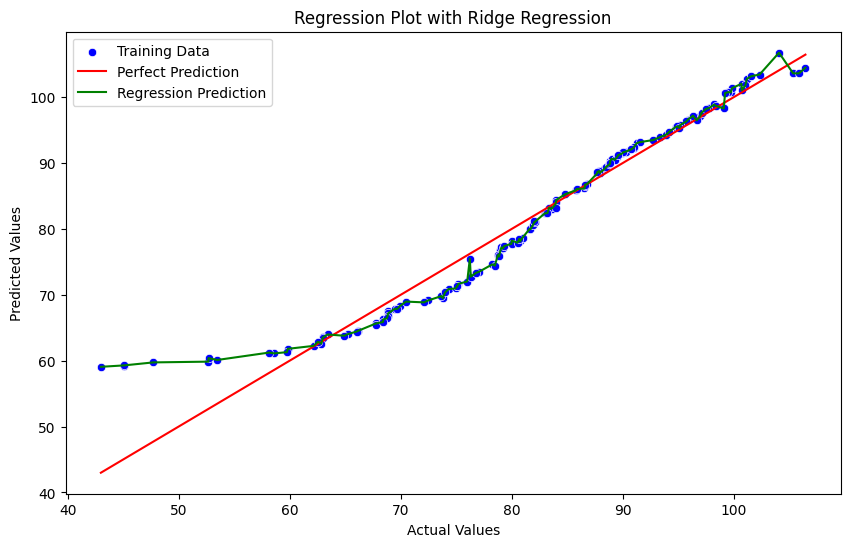

In [ ]:
#Evaluar modelo

best_model = Ridge()
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)


plt.figure(figsize=(10, 6))


sns.scatterplot(x=y_train, y=y_pred_train, color='blue', label='Training Data')

sns.lineplot(x=y_train, y=y_train, color='red', label='Perfect Prediction')
sns.lineplot(x=y_train, y=y_pred_train, color='green', label='Regression Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot with Ridge Regression')


plt.legend()

plt.show()


In [ ]:
# Coefficients from the regression model
coefficients = best_model.coef_

coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(coefficients_df)


                          Feature  Coefficient
0                            Rank     6.159114
1                    Nobel Prices     0.221865
2                      HDI (2021)    -2.947967
3  Mean years of schooling - 2021    -3.174571
4                      GNI - 2021    10.609302
5               Population - 2023     0.711203
